# Paper Trading with Python and Binance - the Spot Testnet API

More Information and getting the Credentials: https://testnet.binance.vision/

__Insert your Spot Testnet Credentials here__:

In [1]:
api_key = "VNRlpmU7cW3b3iGVSqsQbnYpK8Pe8zZR01lNiHTR9dmRala63fK66JQqek4mJ6zo"
secret_key = "OeeHtMJ5ya5udRQq2qts1c46pzabUoTCCIRYoVDn1KyL44UwKatW3duMBP8haSK7"

## Creating a Connection to the Spot Testnet

In [2]:
from binance.client import Client

In [3]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) # Testnet!!!

__Simple Rule:__ <br>
Use your __Testnet Credentials with testnet = True__ and your __"Real Account" Credentials with testnet = False__ (default)

In [4]:
client

In [5]:
client.get_account() # Test account details

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1694007827988,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB', 'free': '2.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '6397.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '997.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '68.00

## Spot Testnet API - Overview

__Same Documentation applies for Spot Testnet:__

https://binance-docs.github.io/apidocs/spot/en/#introduction

In [6]:
import pandas as pd
from binance.client import Client

In [7]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) # Testnet!!!

In [8]:
client.get_system_status()

{'status': 0, 'msg': 'normal'}

In [9]:
account = client.get_account()
account

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1694007827988,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB', 'free': '2.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '6397.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '997.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '68.00

In [10]:
df = pd.DataFrame(account["balances"])
df

,asset,free,locked
0,BNB,2.00000000,0.00000000
1,BTC,1.00000000,0.00000000
2,BUSD,10000.00000000,0.00000000
3,ETH,1.00000000,0.00000000
4,LTC,7.00000000,0.00000000
...,...,...,...
80,CMT,19425.00000000,0.00000000
81,XLM,4167.00000000,0.00000000
82,CND,24737.00000000,0.00000000
83,LEND,972.00000000,0.00000000


In [11]:
df.free = pd.to_numeric(df.free, errors = "coerce")
df.locked = pd.to_numeric(df.locked, errors = "coerce")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asset   85 non-null     object 
 1   free    85 non-null     float64
 2   locked  85 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.1+ KB


In [13]:
client.get_asset_balance(asset = "BTC")

{'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'}

In [14]:
client.get_asset_balance(asset = "ETH")

{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'}

In [15]:
client.get_asset_balance(asset = "EUR")

In [16]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price for one symbol

{'symbol': 'BTCUSDT', 'price': '25846.74000000'}

In [17]:
# get current prices for all pairs
client.get_all_tickers()

[{'symbol': 'BNBBUSD', 'price': '212.50000000'},
 {'symbol': 'BTCBUSD', 'price': '25846.50000000'},
 {'symbol': 'ETHBUSD', 'price': '1618.21000000'},
 {'symbol': 'LTCBUSD', 'price': '61.19000000'},
 {'symbol': 'TRXBUSD', 'price': '0.07828000'},
 {'symbol': 'XRPBUSD', 'price': '0.49830000'},
 {'symbol': 'BNBUSDT', 'price': '212.50000000'},
 {'symbol': 'BTCUSDT', 'price': '25846.74000000'},
 {'symbol': 'ETHUSDT', 'price': '1618.35000000'},
 {'symbol': 'LTCUSDT', 'price': '61.19000000'},
 {'symbol': 'TRXUSDT', 'price': '0.07831000'},
 {'symbol': 'XRPUSDT', 'price': '0.49840000'},
 {'symbol': 'BNBBTC', 'price': '0.00822400'},
 {'symbol': 'ETHBTC', 'price': '0.06262000'},
 {'symbol': 'LTCBTC', 'price': '0.00236700'},
 {'symbol': 'TRXBTC', 'price': '0.00000302'},
 {'symbol': 'XRPBTC', 'price': '0.00001928'},
 {'symbol': 'LTCBNB', 'price': '0.28740000'},
 {'symbol': 'TRXBNB', 'price': '0.00036850'},
 {'symbol': 'XRPBNB', 'price': '0.00234600'},
 {'symbol': 'NEOBTC', 'price': '0.00027510'},
 {

In [18]:
last24 = client.get_ticker(symbol = "BTCUSDT") # 24H Price change statistic
last24

{'symbol': 'BTCUSDT',
 'priceChange': '-57.25000000',
 'priceChangePercent': '-0.221',
 'weightedAvgPrice': '25776.16680931',
 'prevClosePrice': '25903.48000000',
 'lastPrice': '25845.83000000',
 'lastQty': '0.01652800',
 'bidPrice': '25845.83000000',
 'bidQty': '0.00978200',
 'askPrice': '25846.59000000',
 'askQty': '0.01348200',
 'openPrice': '25903.08000000',
 'highPrice': '26302.00000000',
 'lowPrice': '9000.00000000',
 'volume': '1372.09896300',
 'quoteVolume': '35367451.74917180',
 'openTime': 1694302963287,
 'closeTime': 1694389363287,
 'firstId': 256547,
 'lastId': 332271,
 'count': 75725}

In [19]:
timestamp = client._get_earliest_valid_timestamp(symbol = "BTCUSDT", interval = "1d")
timestamp

1693958400000

In [20]:
pd.to_datetime(timestamp, unit = "ms") # reset every month!!!

Timestamp('2023-09-06 00:00:00')

In [21]:
def get_history(symbol, interval, start, end = None):
    bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                        start_str = start, end_str = end, limit = 1000)
    df = pd.DataFrame(bars)
    df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
    df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                  "Clos Time", "Quote Asset Volume", "Number of Trades",
                  "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
    df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
    df.set_index("Date", inplace = True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors = "coerce")
    
    return df

In [22]:
df = get_history(symbol = "BTCUSDT", interval = "1d", start = timestamp)
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-06,26846.26,28268.13,10000.00,25759.90,1609.400310
2023-09-07,25759.94,26532.58,10000.00,26253.04,3328.887766
2023-09-08,26253.90,26438.03,10000.00,25910.49,1986.573462
2023-09-09,25910.66,26226.07,25251.54,25901.60,572.468637
2023-09-10,25901.61,26302.00,9000.00,25845.83,1368.871617


In [23]:
df = get_history(symbol = "BTCUSDT", interval = "1h", start = "2021-09-15")
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-06 13:00:00,26846.26,26846.26,10000.00,26577.80,3.705516
2023-09-06 14:00:00,26577.80,28268.13,22672.64,26009.28,8.581807
2023-09-06 15:00:00,26009.28,28268.00,20000.00,25587.42,63.642582
2023-09-06 16:00:00,25588.01,25638.50,25553.95,25594.14,170.641942
2023-09-06 17:00:00,25595.19,26031.34,25113.28,25869.74,326.280618
...,...,...,...,...,...
2023-09-10 19:00:00,25728.22,26059.19,12848.15,25799.99,81.032164
2023-09-10 20:00:00,25799.99,25983.50,23774.85,25819.00,116.734440
2023-09-10 21:00:00,25820.35,26098.50,9311.80,25901.22,113.830723


### ++++++ Update (August 2023) ++++++++

There are two alterantives to stream live data with python-binance:
- using __ThreadedWebsocketManager__ -or-
- using __BinanceSocketManager (newly added to the course)__

__What´s the benefit of covering both options?__<br>
-> We can now __run Trading Bots in Jupyter and as a Script__ with the __latest Versions__ for Python and Python-Binance. No need to care about Versions and Installations anymore!

For more information, please go back to the previous Lectures (API Intro)!

### Option 1: ThreadedWebsocketManager (only executable in scripts, not in Jupyter!):

In [24]:
from binance import ThreadedWebsocketManager

In [25]:
def stream_data(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = msg["c"]
    
    print("Time: {} | Price: {}".format(time, price))

In [26]:
# initialize and start the WebSocket
twm = ThreadedWebsocketManager()
twm.start()

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/markwindsor/Desktop/atlas_trade/.venv/lib/python3.9/site-packages/binance/threaded_stream.py", line 59, in run
    self._loop.run_until_complete(self.socket_listener())
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 618, in run_until_complete


In [27]:
# subscribe to the stream
twm.start_symbol_miniticker_socket(callback = stream_data, symbol = "BTCUSDT")

    self._check_running()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 578, in _check_running
    raise RuntimeError('This event loop is already running')
RuntimeError: This event loop is already running


/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/threading.py:975: RuntimeWarning: coroutine 'ThreadedApiManager.socket_listener' was never awaited
  self._invoke_excepthook(self)


KeyboardInterrupt: 

In [ ]:
# stop the Websocket/Stream after 20 seconds
while True:
    time.sleep(20)
    twm.stop()
    break

---------------------------

### Option 2: BinanceSocketManager (executable in Jupyter!):

In [28]:
stream_data

<function __main__.stream_data(msg)>

In [29]:
import asyncio
from binance import AsyncClient, BinanceSocketManager

In [30]:
async def main():
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    ts = bm.symbol_miniticker_socket(symbol = "BTCUSDT")
    
    async with ts as tscm:
        for _ in range(10):
            res = await tscm.recv()
            stream_data(res)

    await client.close_connection()
await main()

Time: 2023-09-10 23:43:42.920000 | Price: 25840.26000000
Time: 2023-09-10 23:43:44.748000 | Price: 25840.26000000
Time: 2023-09-10 23:43:44.848000 | Price: 25840.26000000
Time: 2023-09-10 23:43:48.269000 | Price: 25840.25000000
Time: 2023-09-10 23:43:51.261000 | Price: 25840.26000000
Time: 2023-09-10 23:43:51.834000 | Price: 25840.25000000
Time: 2023-09-10 23:43:53.185000 | Price: 25840.25000000
Time: 2023-09-10 23:43:55.358000 | Price: 25840.25000000
Time: 2023-09-10 23:43:57.628000 | Price: 25840.25000000
Time: 2023-09-10 23:43:58.371000 | Price: 25840.25000000


## Placing a Market Buy Order

In [31]:
from binance.client import Client
import pandas as pd

In [32]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [33]:
client.get_account() 

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1694007827988,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB', 'free': '2.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '6397.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '997.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '68.00

In [34]:
# buy 0.1 BTC
order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)

In [35]:
order

{'symbol': 'BTCUSDT',
 'orderId': 2749980,
 'orderListId': -1,
 'clientOrderId': 'SKUP35a916gcOuSvKMItub',
 'transactTime': 1694389440863,
 'price': '0.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.10000000',
 'cummulativeQuoteQty': '2584.04665876',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'workingTime': 1694389440863,
 'fills': [{'price': '25840.26000000',
   'qty': '0.02863800',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332345},
  {'price': '25840.26000000',
   'qty': '0.01000000',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332346},
  {'price': '25840.36000000',
   'qty': '0.01597900',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332347},
  {'price': '25840.68000000',
   'qty': '0.04538300',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332348}],
 'selfTradePreventionMode': 'NONE'}

In [36]:
df = pd.DataFrame(order["fills"])
df

,price,qty,commission,commissionAsset,tradeId
0,25840.26000000,0.02863800,0.00000000,BTC,332345
1,25840.26000000,0.01000000,0.00000000,BTC,332346
2,25840.36000000,0.01597900,0.00000000,BTC,332347
3,25840.68000000,0.04538300,0.00000000,BTC,332348


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            4 non-null      object
 1   qty              4 non-null      object
 2   commission       4 non-null      object
 3   commissionAsset  4 non-null      object
 4   tradeId          4 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 288.0+ bytes


In [38]:
num_columns = ["price", "qty", "commission"]

In [39]:
for column in num_columns:
    df[column] = pd.to_numeric(df[column], errors = "coerce")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            4 non-null      float64
 1   qty              4 non-null      float64
 2   commission       4 non-null      float64
 3   commissionAsset  4 non-null      object 
 4   tradeId          4 non-null      int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 288.0+ bytes


In [41]:
df.qty.sum()

0.1

In [42]:
df.price.mul(df.qty).sum()

2584.0466587600004

In [43]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1694389440863,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB', 'free': '2.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.10000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '6397.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '7415.95334124', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '997.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '68.000

In [44]:
# buy BTC for 1,000 USDT 
order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quoteOrderQty = 1000)

In [45]:
order

{'symbol': 'BTCUSDT',
 'orderId': 2749985,
 'orderListId': -1,
 'clientOrderId': 'g7X6lWQa7zX55drWkSxTZe',
 'transactTime': 1694389441977,
 'price': '0.00000000',
 'origQty': '0.03869800',
 'executedQty': '0.03869800',
 'cummulativeQuoteQty': '999.98353180',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'workingTime': 1694389441977,
 'fills': [{'price': '25840.69000000',
   'qty': '0.03792500',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332349},
  {'price': '25841.35000000',
   'qty': '0.00077300',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332350}],
 'selfTradePreventionMode': 'NONE'}

In [46]:
avr_price = float(order["cummulativeQuoteQty"]) / float(order["origQty"]) 
avr_price

25840.703183627058

In [47]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1694389441977,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB', 'free': '2.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.13869800', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '6397.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '6415.96980944', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '997.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '68.000

## Placing a Market Sell Order

In [48]:
# selling 0.118011 BTC 
order = client.create_order(symbol = "BTCUSDT", side = "SELL", type = "MARKET", quantity = 0.1)

In [49]:
order

{'symbol': 'BTCUSDT',
 'orderId': 2750000,
 'orderListId': -1,
 'clientOrderId': 'uyfs1LiWbpxpBpUx2subjB',
 'transactTime': 1694389443105,
 'price': '0.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.10000000',
 'cummulativeQuoteQty': '2583.98614406',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'SELL',
 'workingTime': 1694389443105,
 'fills': [{'price': '25840.25000000',
   'qty': '0.02283300',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 332353},
  {'price': '25840.25000000',
   'qty': '0.01000000',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 332354},
  {'price': '25840.05000000',
   'qty': '0.00941200',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 332355},
  {'price': '25840.00000000',
   'qty': '0.00100000',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 332356},
  {'price': '25839.70000000',
   'qty': '0.01570900',
   'commission

In [50]:
client.get_account() # Test account details

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1694389443105,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB', 'free': '2.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.03869800', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '6397.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '8999.95595350', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '997.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '68.000

## Placing Limit Orders

In [51]:
from binance.client import Client
import pandas as pd

In [52]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [53]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1694389443105,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB', 'free': '2.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.03869800', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '6397.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '8999.95595350', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '997.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '68.000

In [54]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price

{'symbol': 'BTCUSDT', 'price': '25841.28000000'}

__Limit Buy Order__

In [55]:
order1 = client.create_order(symbol="BTCUSDT", side = "BUY", type = "LIMIT",
                            quantity = 0.1, timeInForce = "GTC", price = 50000)

In [56]:
order1

{'symbol': 'BTCUSDT',
 'orderId': 2750020,
 'orderListId': -1,
 'clientOrderId': 'OEyCKWE5b4o2JGh8r1UlPF',
 'transactTime': 1694389445978,
 'price': '50000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.10000000',
 'cummulativeQuoteQty': '2584.10111579',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'workingTime': 1694389445978,
 'fills': [{'price': '25840.26000000',
   'qty': '0.03057300',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332365},
  {'price': '25841.28000000',
   'qty': '0.00900000',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332366},
  {'price': '25841.35000000',
   'qty': '0.05339100',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332367},
  {'price': '25841.36000000',
   'qty': '0.00703600',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 332368}],
 'selfTradePreventionMode': 'NONE'}

In [57]:
order_id_buy = order1["orderId"]
order_id_buy

2750020

In [58]:
client.get_order(symbol = "BTCUSDT", orderId = order_id_buy)

{'symbol': 'BTCUSDT',
 'orderId': 2750020,
 'orderListId': -1,
 'clientOrderId': 'OEyCKWE5b4o2JGh8r1UlPF',
 'price': '50000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.10000000',
 'cummulativeQuoteQty': '2584.10111579',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'stopPrice': '0.00000000',
 'icebergQty': '0.00000000',
 'time': 1694389445978,
 'updateTime': 1694389445978,
 'isWorking': True,
 'workingTime': 1694389445978,
 'origQuoteOrderQty': '0.00000000',
 'selfTradePreventionMode': 'NONE'}

__Limit Sell Order__

In [59]:
order2 = client.create_order(symbol="BTCUSDT", side = "SELL", type = "LIMIT",
                            quantity = 0.1, timeInForce = "GTC", price = 60000)

In [60]:
order2

{'symbol': 'BTCUSDT',
 'orderId': 2750025,
 'orderListId': -1,
 'clientOrderId': '484TywtV86OBcAFotjTaO7',
 'transactTime': 1694389446821,
 'price': '60000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'SELL',
 'workingTime': 1694389446821,
 'fills': [],
 'selfTradePreventionMode': 'NONE'}

In [61]:
order_id_sell = order2["orderId"]
order_id_sell

2750025

In [62]:
open_orders = client.get_open_orders(symbol = "BTCUSDT")
open_orders

[{'symbol': 'BTCUSDT',
  'orderId': 2750025,
  'orderListId': -1,
  'clientOrderId': '484TywtV86OBcAFotjTaO7',
  'price': '60000.00000000',
  'origQty': '0.10000000',
  'executedQty': '0.00000000',
  'cummulativeQuoteQty': '0.00000000',
  'status': 'NEW',
  'timeInForce': 'GTC',
  'type': 'LIMIT',
  'side': 'SELL',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1694389446821,
  'updateTime': 1694389446821,
  'isWorking': True,
  'workingTime': 1694389446821,
  'origQuoteOrderQty': '0.00000000',
  'selfTradePreventionMode': 'NONE'}]

In [63]:
pd.DataFrame(open_orders)

,symbol,orderId,orderListId,clientOrderId,price,origQty,executedQty,cummulativeQuoteQty,status,timeInForce,type,side,stopPrice,icebergQty,time,updateTime,isWorking,workingTime,origQuoteOrderQty,selfTradePreventionMode
0,BTCUSDT,2750025,-1,484TywtV86OBcAFotjTaO7,60000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,SELL,0.00000000,0.00000000,1694389446821,1694389446821,True,1694389446821,0.00000000,NONE


In [64]:
result = client.cancel_order(symbol = "BTCUSDT", orderId = order_id_buy)
result

BinanceAPIException: APIError(code=-2011): Unknown order sent.

In [ ]:
result = client.cancel_order(symbol = "BTCUSDT", orderId = order_id_sell)
result

## Reporting: Getting all (historical) Orders and Trades

In [ ]:
from binance.client import Client
import pandas as pd

In [ ]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [ ]:
all_orders = client.get_all_orders(symbol = "BTCUSDT")
all_orders

In [ ]:
pd.DataFrame(all_orders)

In [ ]:
trades = client.get_my_trades(symbol = "BTCUSDT")
trades

In [ ]:
df = pd.DataFrame(trades)
df

In [ ]:
df.time = pd.to_datetime(df.time, unit = "ms", errors = "coerce")

In [ ]:
df

## Creating & Running a first (simple) Trading Bot

In [ ]:
from binance.client import Client
import pandas as pd

In [ ]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True)

In [ ]:
client.get_account()

### Random Trading Bot

__A simple random Trading Bot__: Stream Market Data and buy 0.1 BTC (with USDT) once condition x (Price and/or Volume) has been met. Then stop the Stream.

Condition x: Price (rounded down) is divisible by 10 without remainder.

In [ ]:
40215 % 10 # modulo

__Using the Miniticker Stream:__

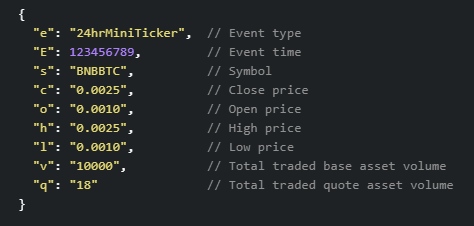

### Option 1: ThreadedWebsocketManager (only executable in scripts, not in Jupyter!):

In [ ]:
from binance import ThreadedWebsocketManager

In [ ]:
twm = ThreadedWebsocketManager()
twm.start()

In [ ]:
def simple_bot(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = float(msg["c"])
    
    print("Time: {} | Price: {}".format(time, price))
    
    if int(price) % 10 == 0:
        order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)
        print("\n" + 50 * "-")
        print("Buy {} BTC for {} USDT".format(order["executedQty"], order["cummulativeQuoteQty"]))
        print(50 * "-" + "\n")
        
        twm.stop() # stop defined inside callback

In [ ]:
twm.start_symbol_miniticker_socket(callback = simple_bot, symbol = "BTCUSDT")
twm.join() # required if stop is defined in callback function

-----------------------------

### Option 2: BinanceSocketManager (executable in Jupyter!): 

In [ ]:
import asyncio
from binance import AsyncClient, BinanceSocketManager

In [ ]:
stop_streaming = False # setting a stop_streaming variable (initially: False)

In [ ]:
def simple_bot(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = float(msg["c"])
    
    print("Time: {} | Price: {}".format(time, price))
    
    if int(price) % 10 == 0:
        order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)
        print("\n" + 50 * "-")
        print("Buy {} BTC for {} USDT".format(order["executedQty"], order["cummulativeQuoteQty"]))
        print(50 * "-" + "\n")
        
        global stop_streaming
        stop_streaming = True  # stop defined inside callback

In [ ]:
async def main():
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    ts = bm.symbol_miniticker_socket(symbol="BTCUSDT")
    
    async with ts as tscm:
        while True:
            res = await tscm.recv()
            simple_bot(res)
            
            if stop_streaming:
                break

    await client.close_connection()

In [ ]:
await main()

In [ ]:
client.get_account() 